<a href="https://colab.research.google.com/github/zelal-Eizaldeen/deeplearning_course_from_perceptron_to_llm/blob/main/3_7AvoidingSaturatedNeurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Now let's talk about how to avoid **saturating neurons and vanishing gradients**. We will now discuss issues that prevent networks from learning and solutions to these problems. Let's start looking at the activation function.

#Saturated neurons and vanishing gradients

The slide shows both the tanh and the sigmoid function.

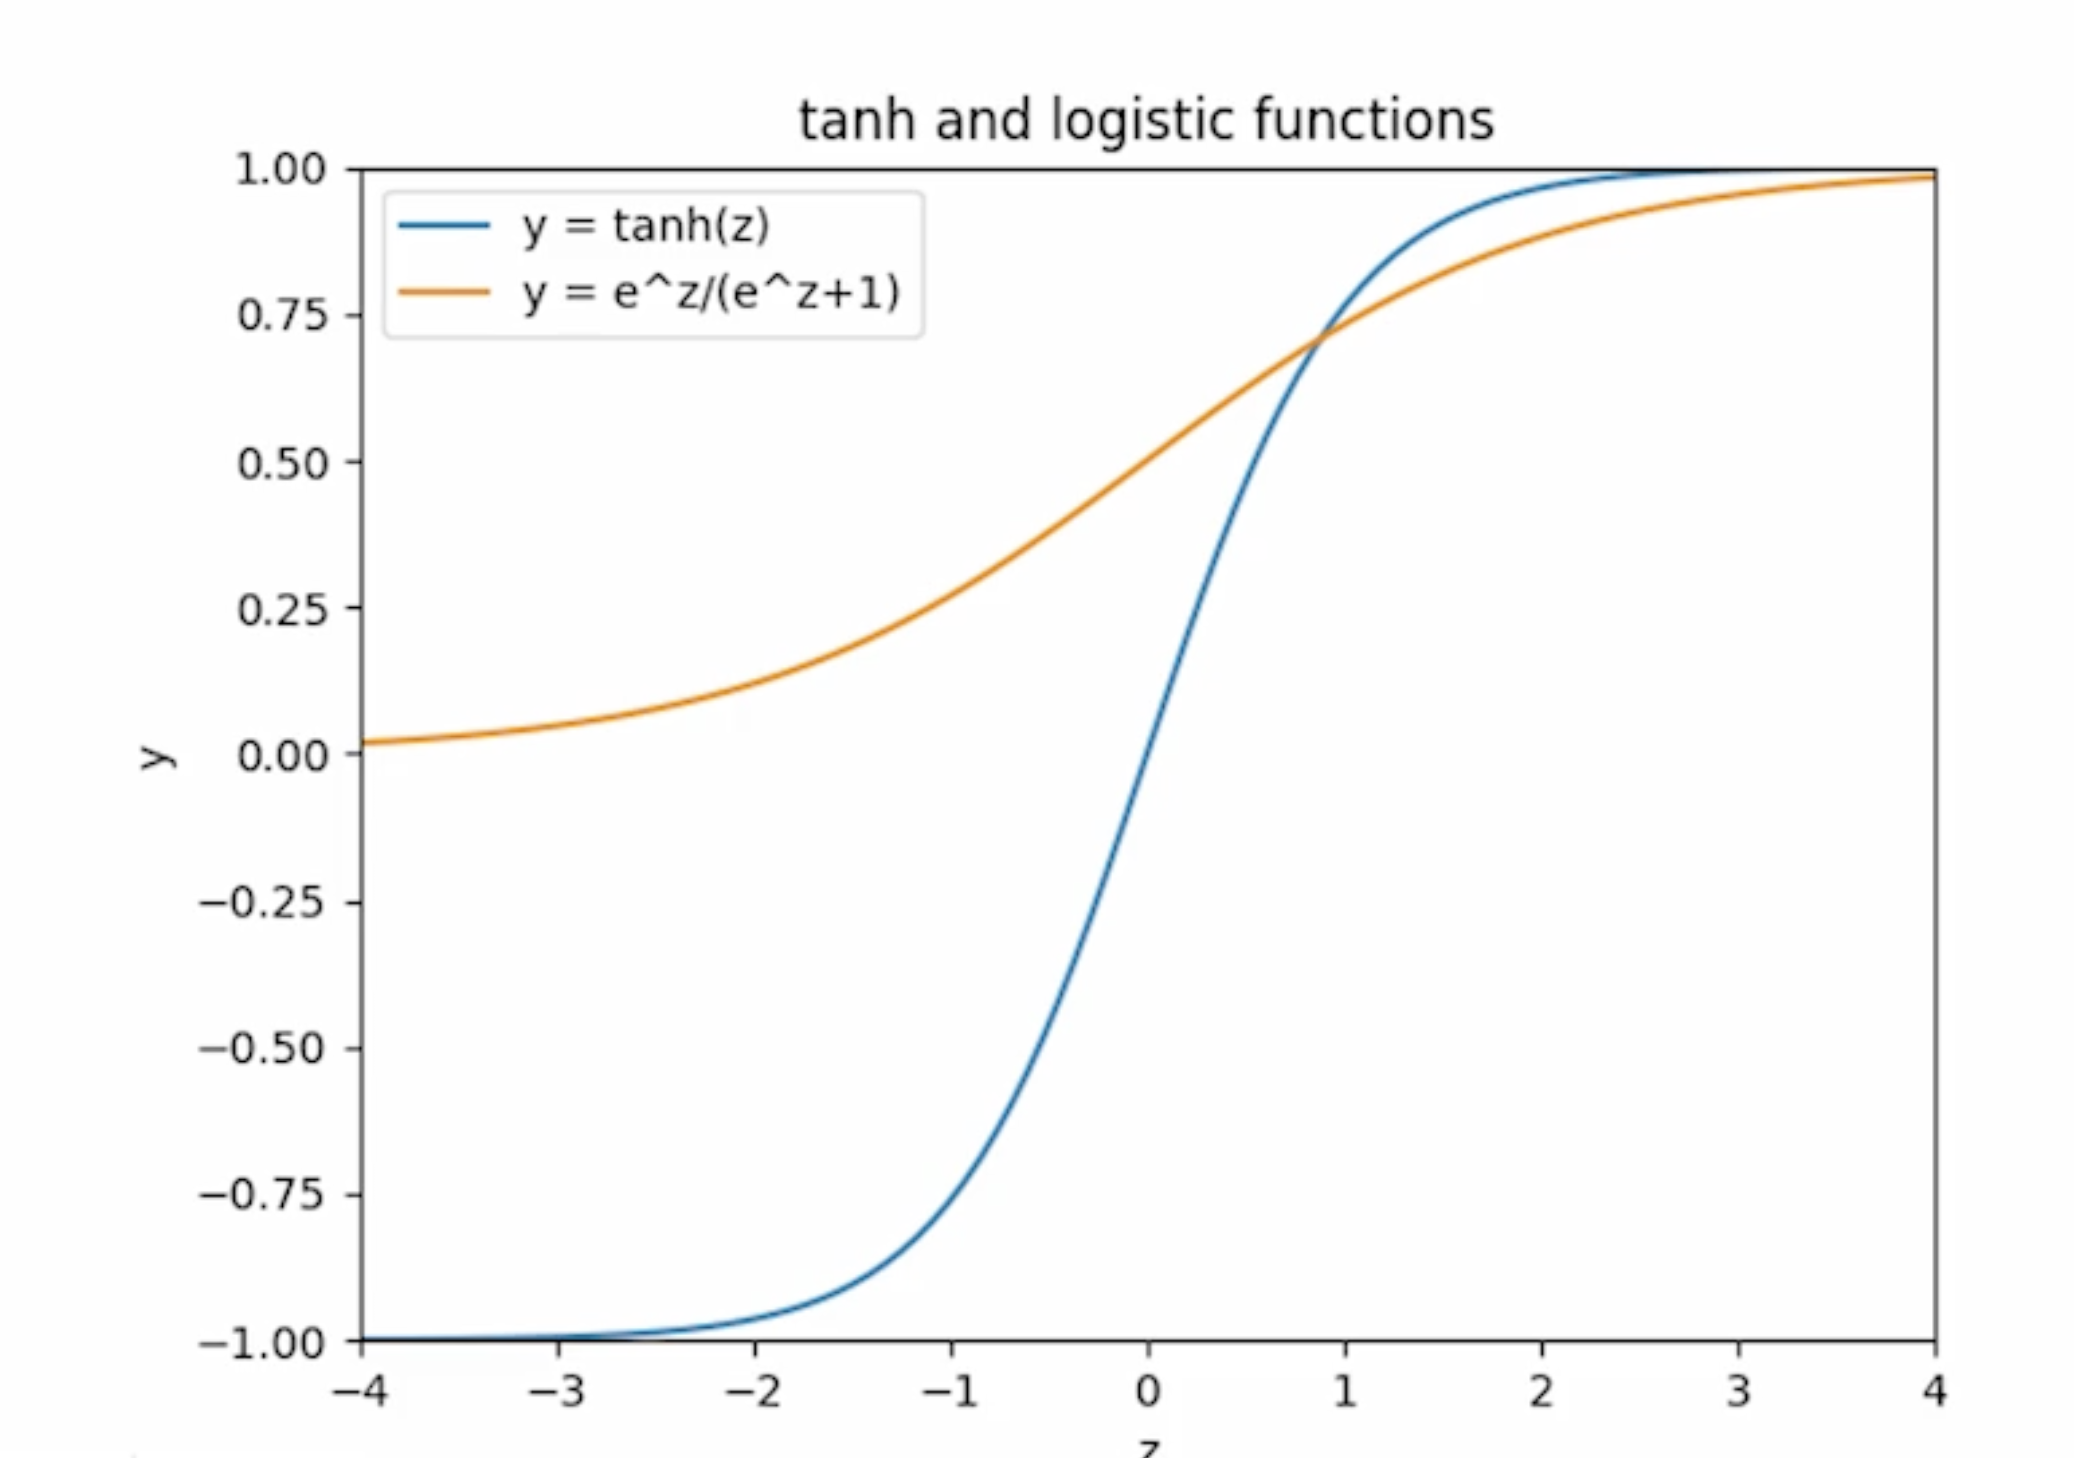

We see that if we move far left or right in the figure, the derivative is near zero because the curves become horizontal. This happens when the weighted sum is far from zero. That is either highly positive or negative,

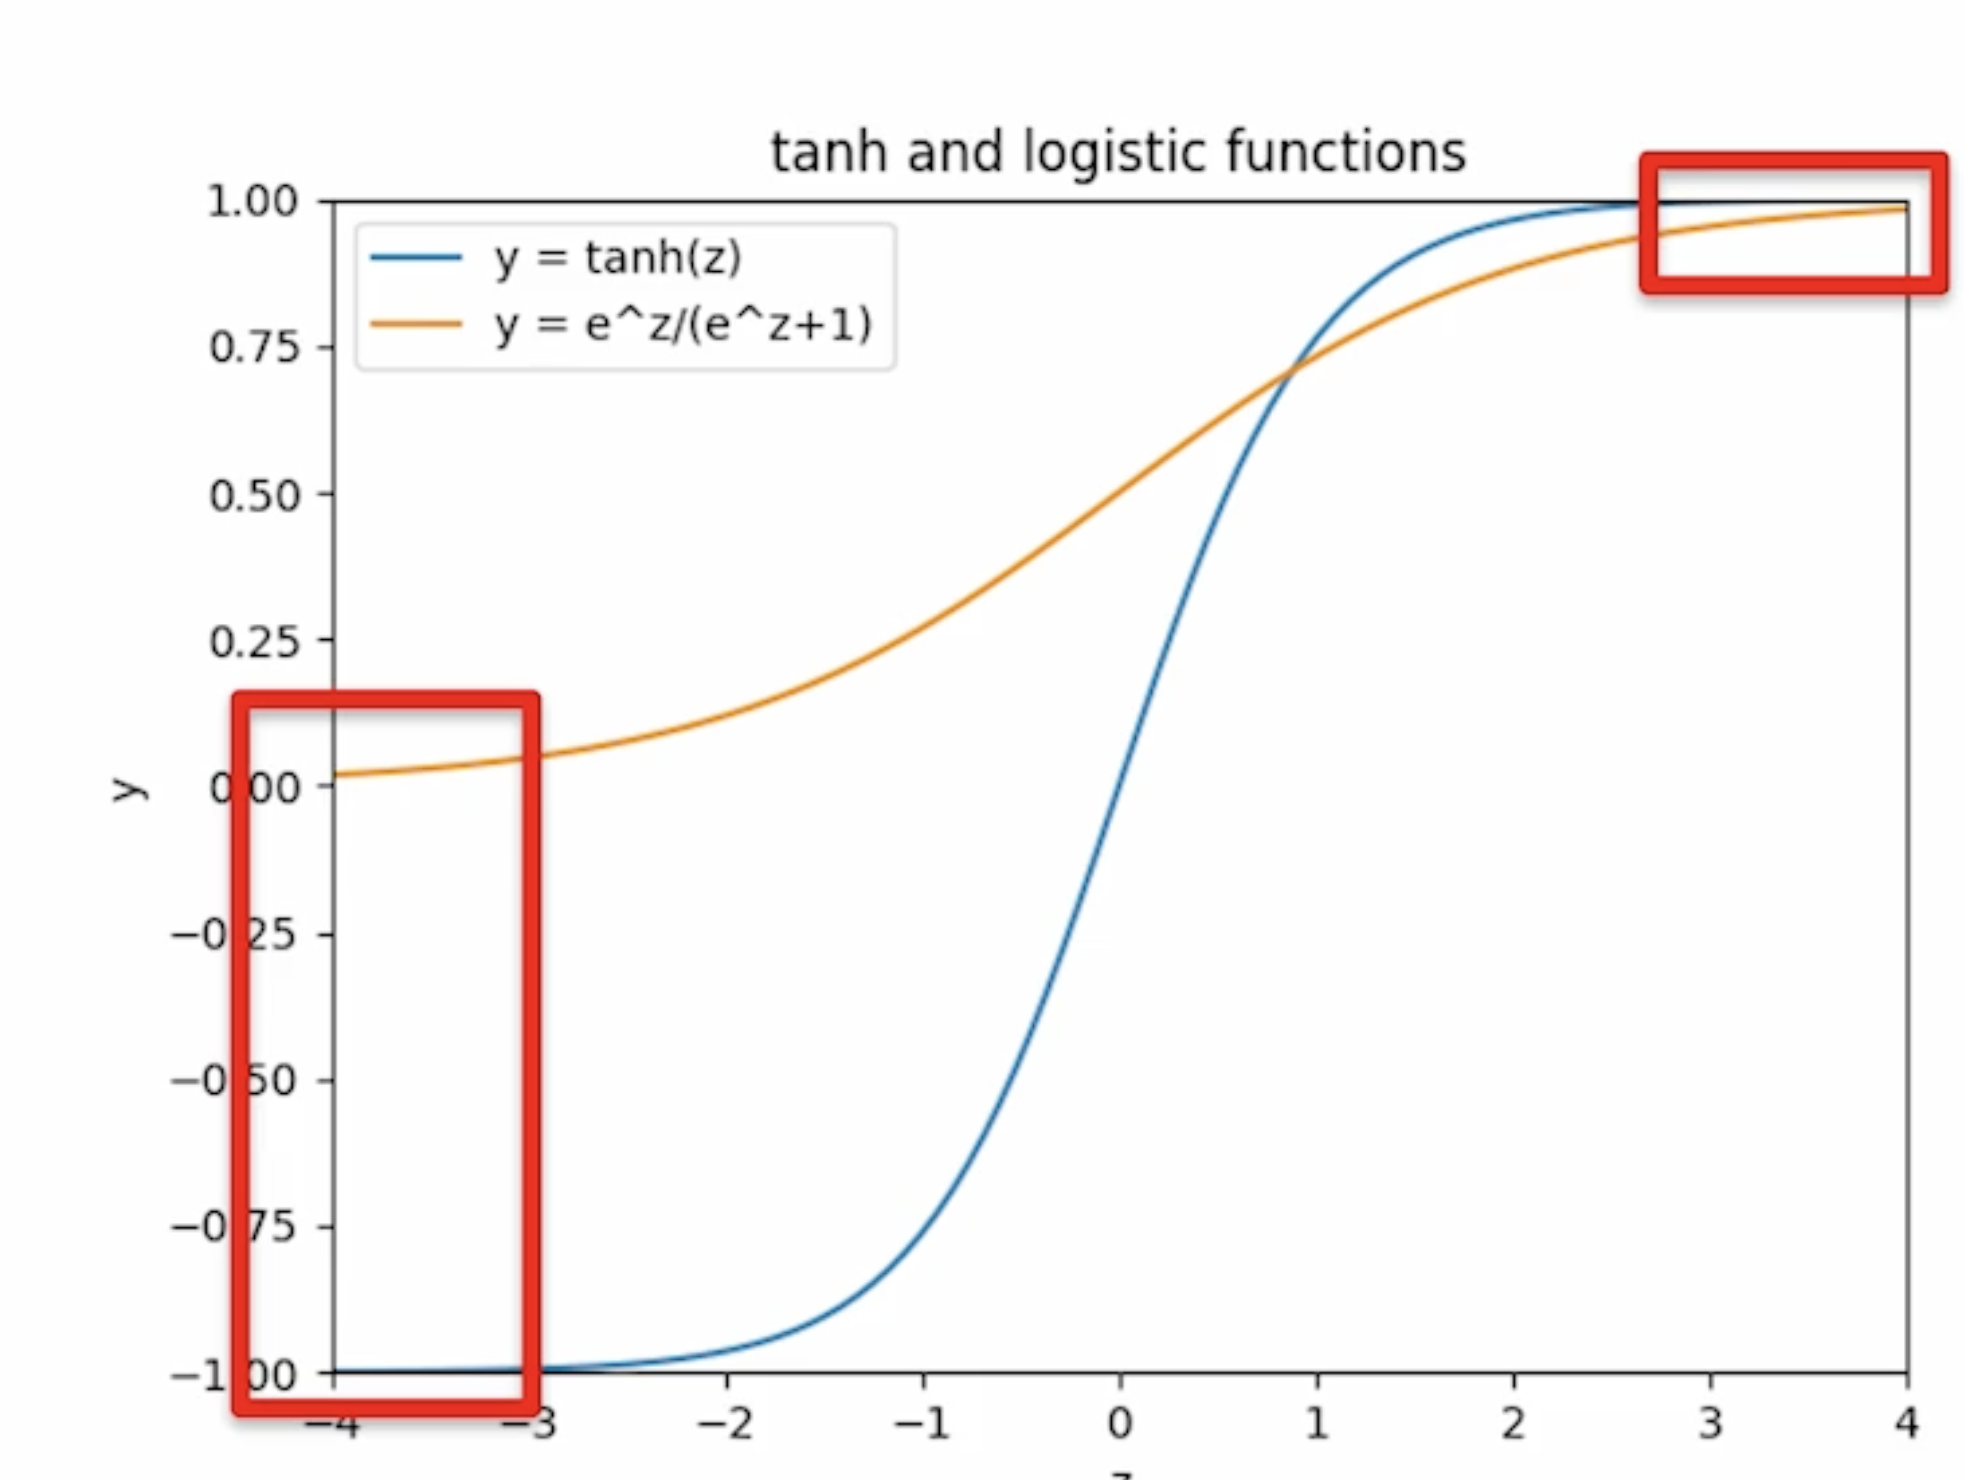

and we call that the neuron becomes **saturated**. Let's now consider what happens to backpropagation. When we do **backpropagation, we take the derivative of the error times the derivative of the activation function**, but if the neuron is saturated, this derivative is zero, and that means that the **weight adjustment will be zero.** That is the network stops learning. Put that differently. When we are in the saturated region, a small change to the input will not change the output, and therefore, we will not adjust the weights.

# Analogy
The Tired Student and the Multiplication Table

Imagine you’re learning your times tables — 2×1, 2×2, 2×3, and so on.
At first, your brain is paying close attention — every new number helps you learn.
When your teacher corrects you, you listen and change how you think — that’s like your brain’s weights adjusting.

But then, after practicing too much without a break, your brain gets tired.
Even if the teacher corrects you, you don’t really hear it anymore —
you just stare and say, “I already know this!” even if you don’t.

That’s like a neuron becoming saturated —
your brain is stuck, no matter what correction comes in, it doesn’t change.

# Backpropagation Part

When your teacher gives feedback (the “error”), your brain should use it to get better next time — that’s what backpropagation does.
But if your brain is “tired” (saturated), it stops listening —
so no matter how much feedback you get, you don’t improve.
That’s why we say the network stops learning.

Instead, we want the weighted sums to be in the so-called **active region closer to zero,** at **least in the very beginning of the learning process to make sure that the weights get adjusted**.

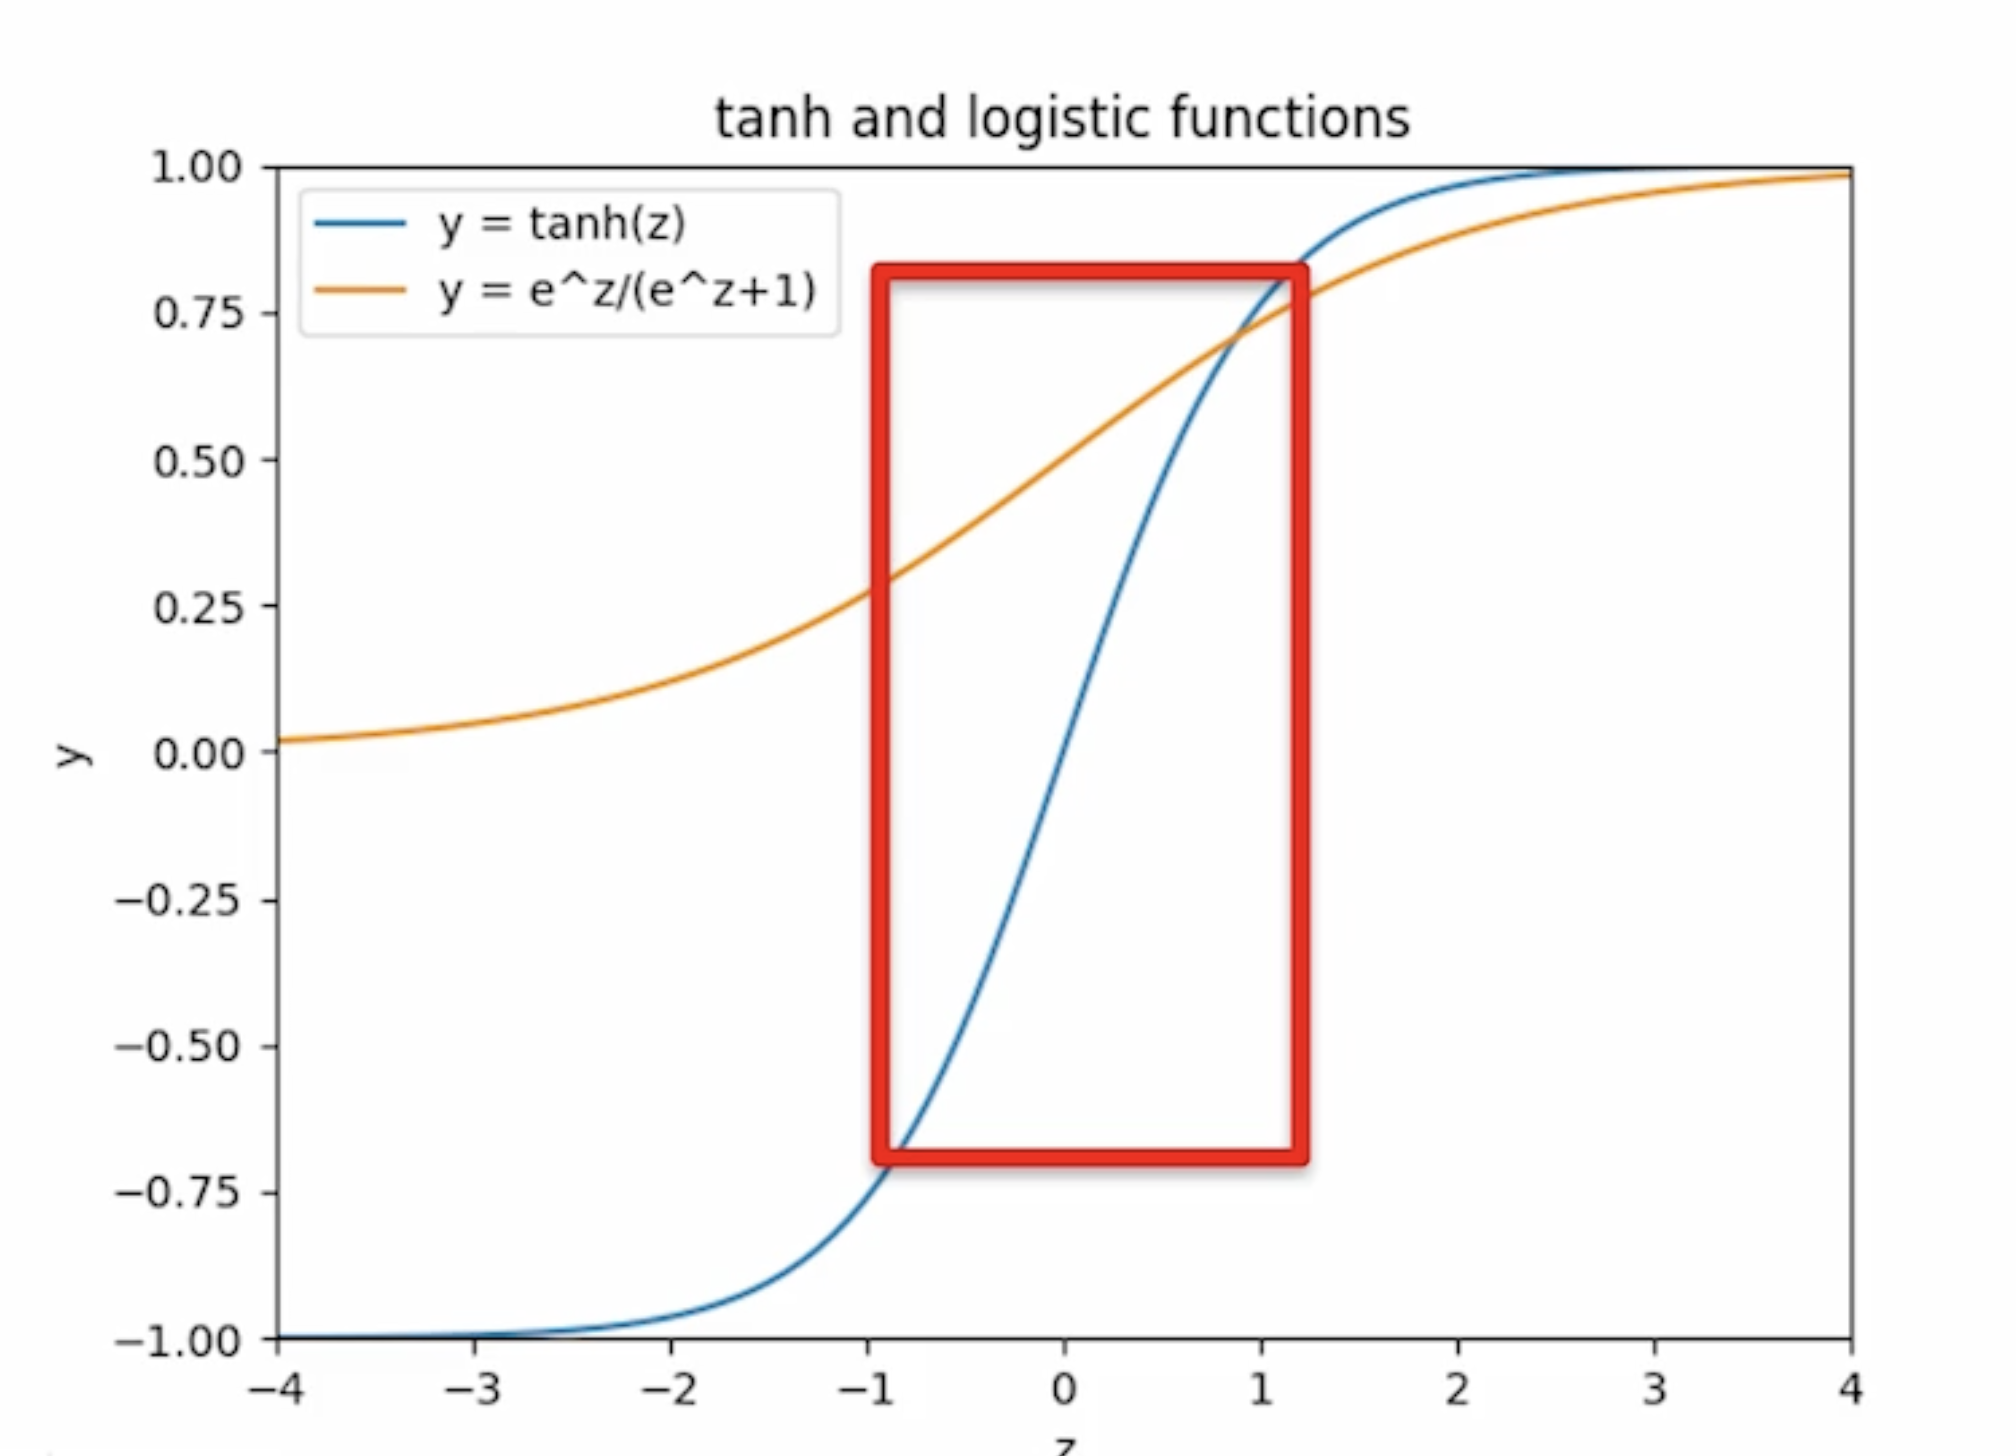

 If we compare the tanh function to the sigmoid function, we see another difference. We see that the maximum derivative of tanh is 1.0, while the maximum derivative of the sigmoid function is just 0.25. This will impact what happens when we stack layers. Consider when we are backpropagating the error through multiple layers. Every time we will multiply by the derivative of the activation function. When we do this with sigmoid layers, even if we are in the active region, we will at most multiply by 0.25. If we multiply by 0.25 repeatedly,**the gradient will slowly approach zero** even if we're not in the saturated region of the neuron. This is known as **the vanishing gradient problem.**

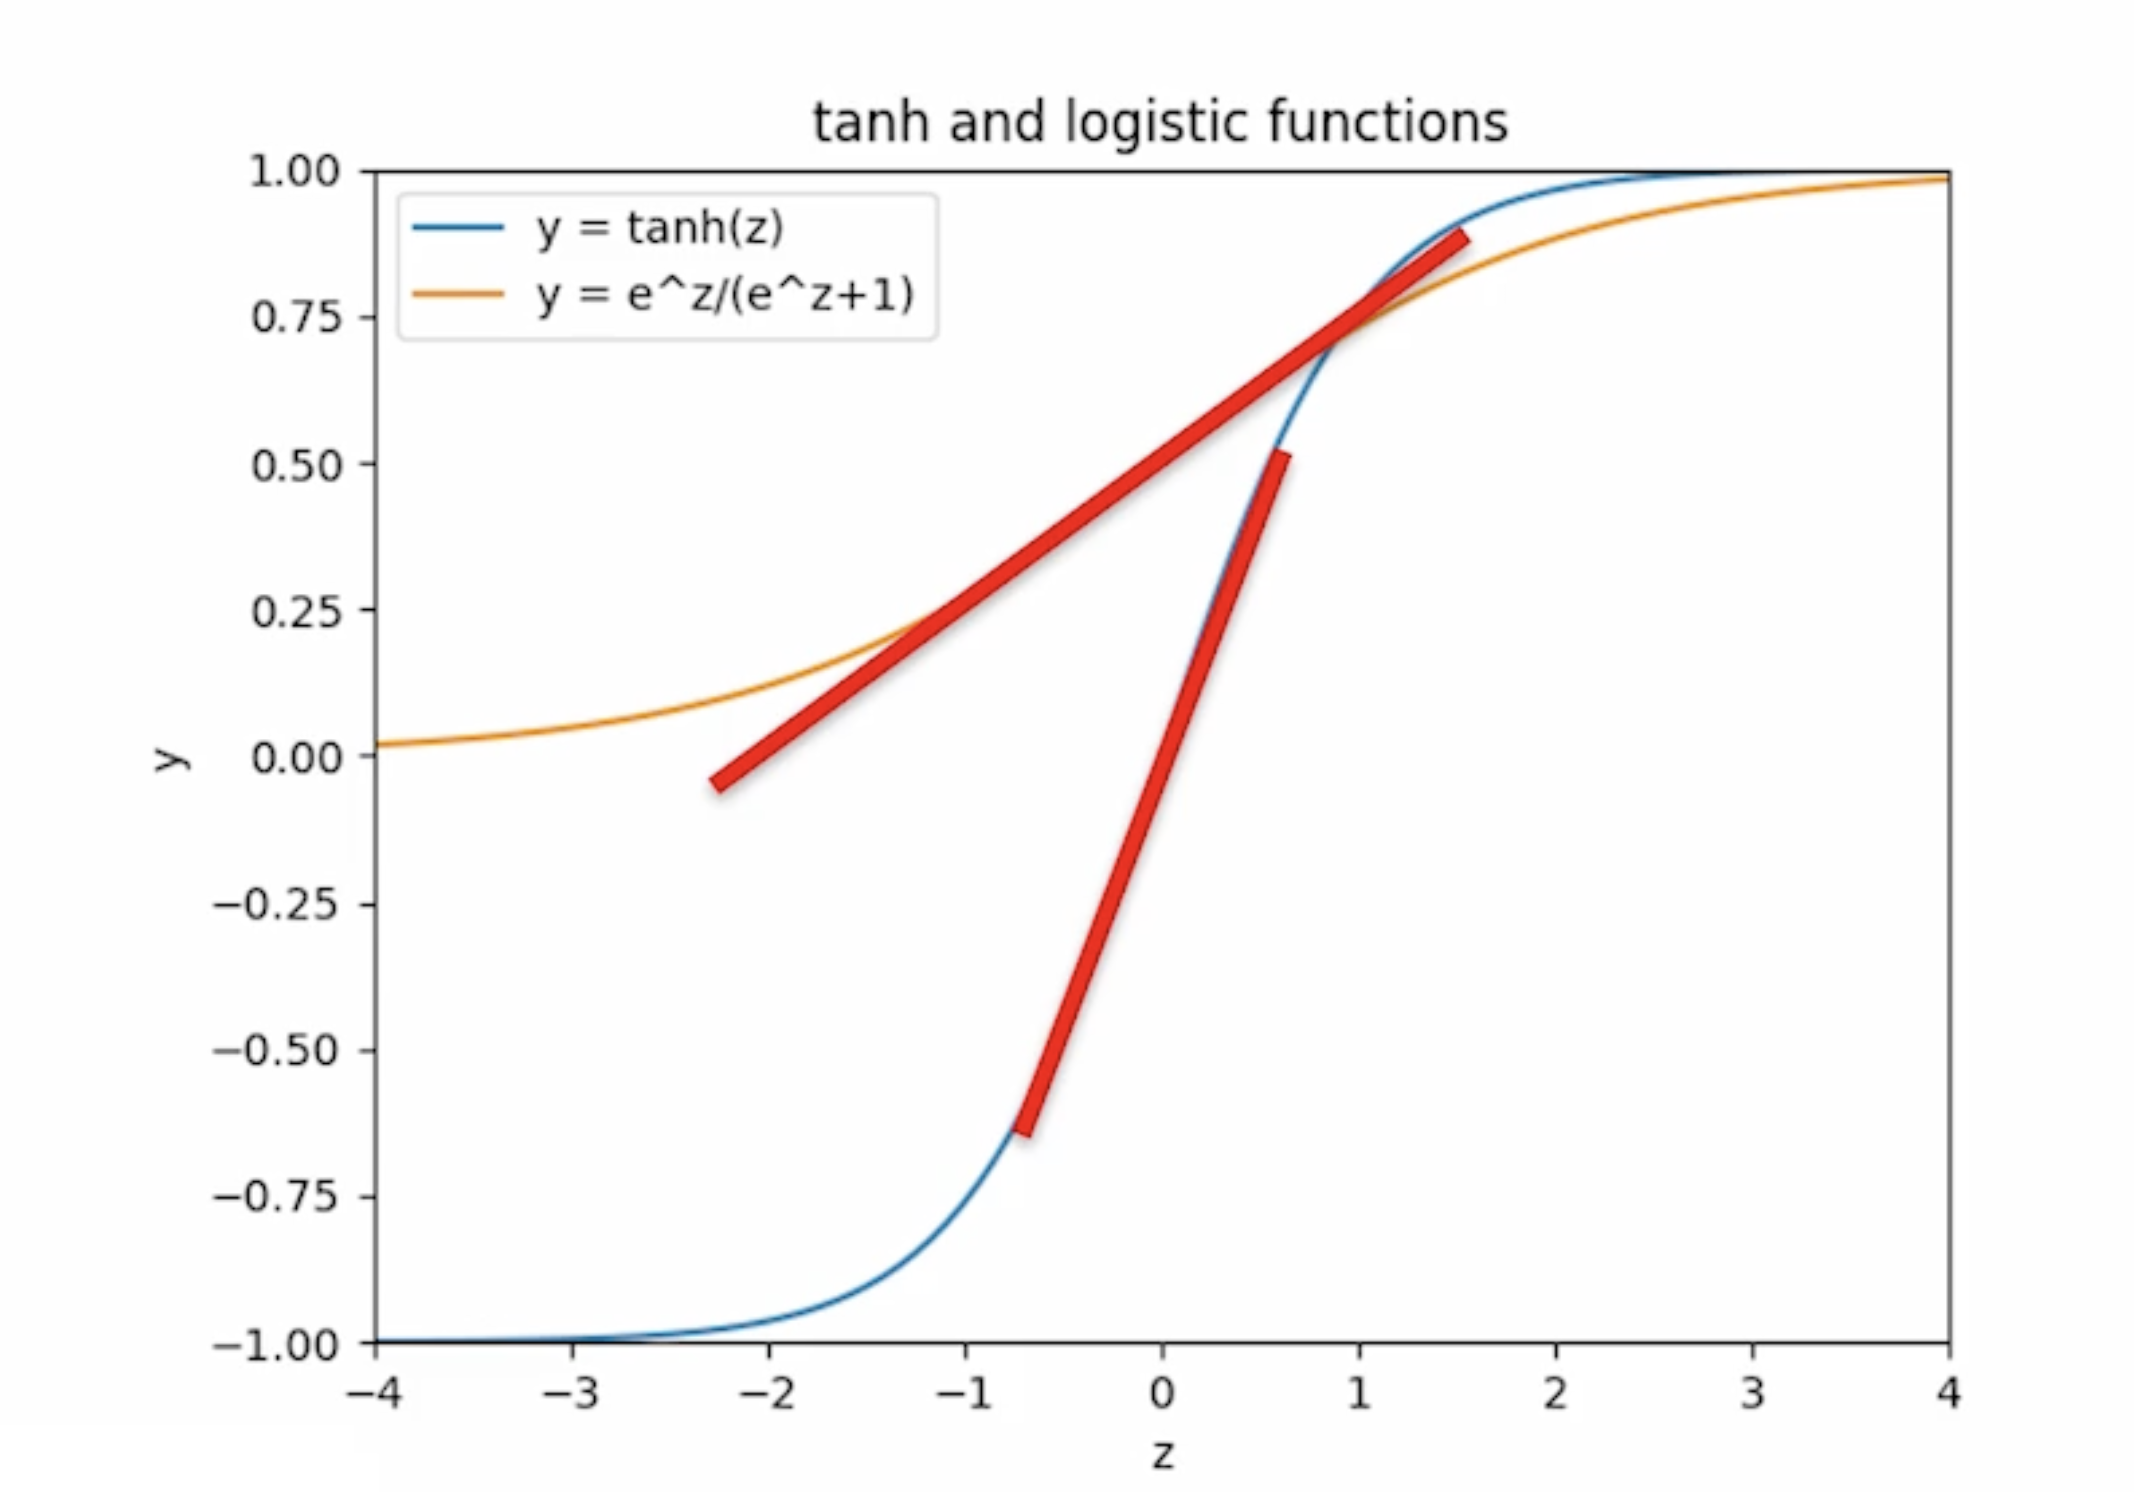

This explains why it's better to use tanh as hidden layers in the network rather than sigmoid.

# Analogy of vanishing gradient problem


Think of the gradient like a message being whispered from the last layer back to the first.
If every person in the line whispers only a quarter as loud as they heard it,
after 5 or 10 people, the first one hears almost nothing.
That’s exactly what happens when we backpropagate through many sigmoid layers.

# Recall
The derivative of a curve tells you **how steep the curve is **—
in other words, **how fast it’s changing at a given point**.

# How to mitigate the saturated neurons or the vanishing gradient problem?

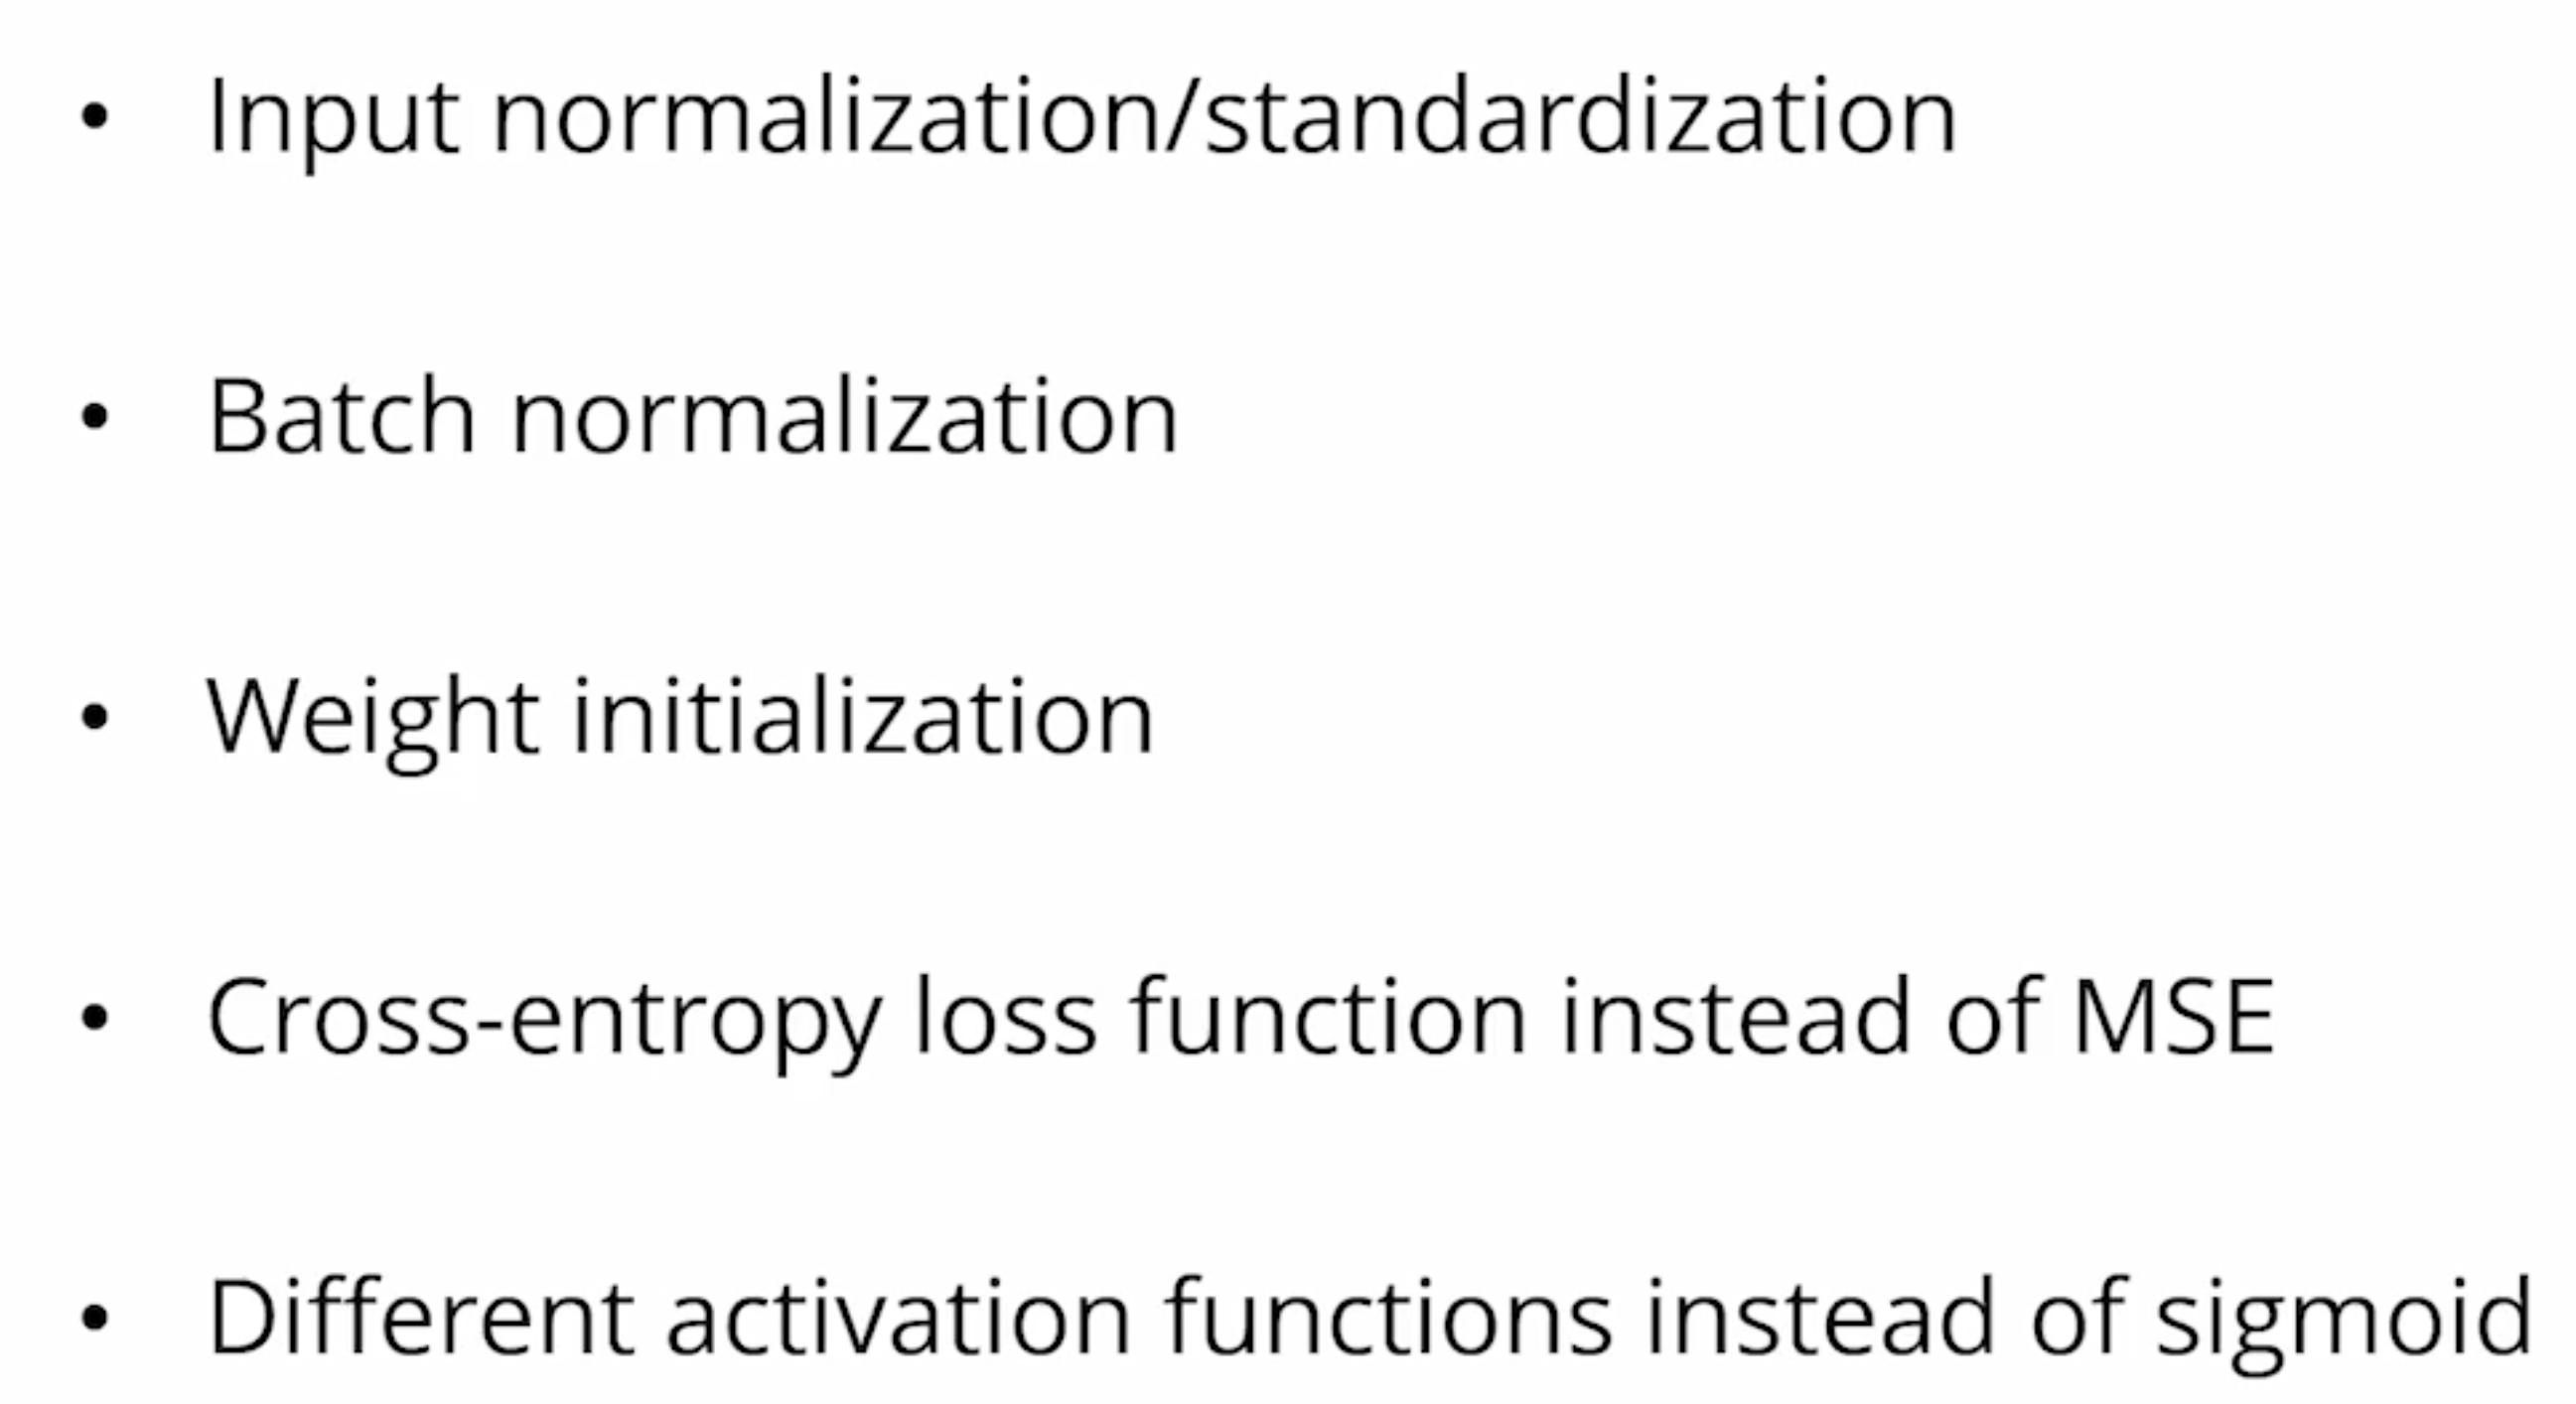

The first three will be discussed in this video, and the last two will be discussed in the next video. All of these techniques either reduce or avoid saturated neurons and vanishing gradients. Some techniques only apply to specific layers, such as the input layer or the output layer, whereas other techniques can be used for the hidden layers.

We will start with **input normalization.**

# 1.Input normalization

We saw on a previous slide that both the sigmoid and tanh neuron can saturate on both sides. This happens when the inputs to the neuron is of large magnitude.
Let's consider **the first layer in the network**. Here we can avoid saturation if we make sure that the** input values themselves are close to zero**. This will imply **that the weighted sum is closer to zero**. We can do this by adjusting the input values, something known as **normalization**

or **standardization of the data**. There are many methods.
- Let's start with a common one, which is to **scale the value to be between zero and one**. In cases where we have the input data as a grayscale image, we know that each pixel is between zero and 255.

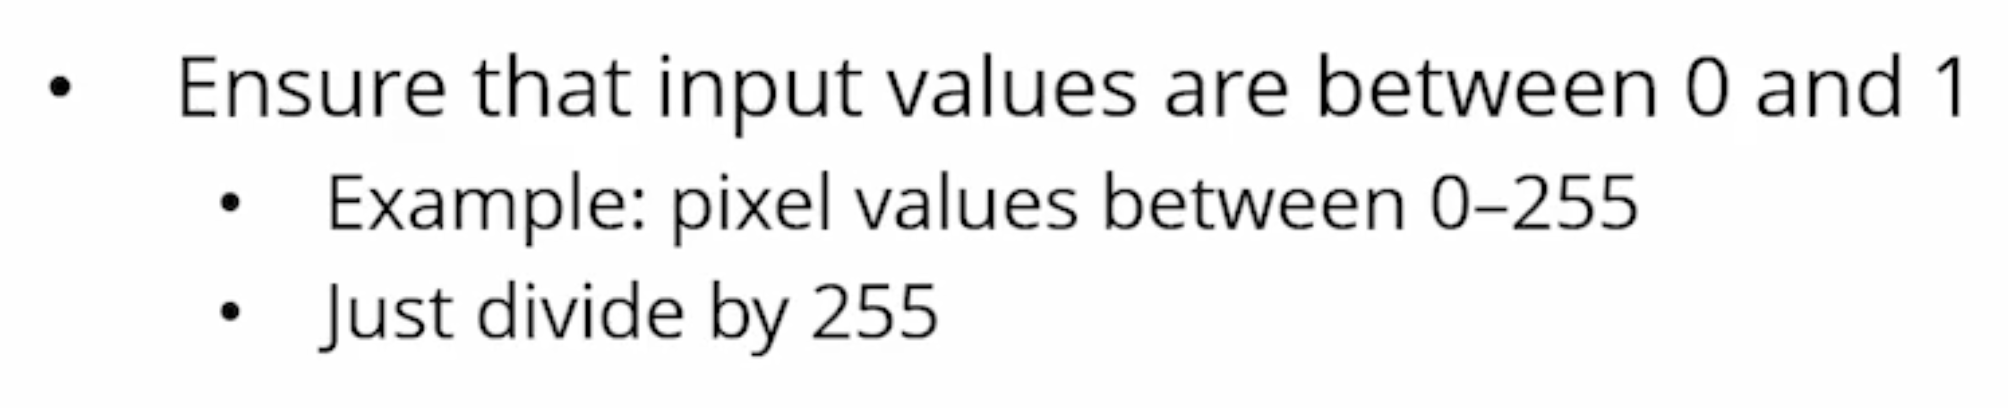

We can simply divide the value by 255, which will result in a number between zero and one.

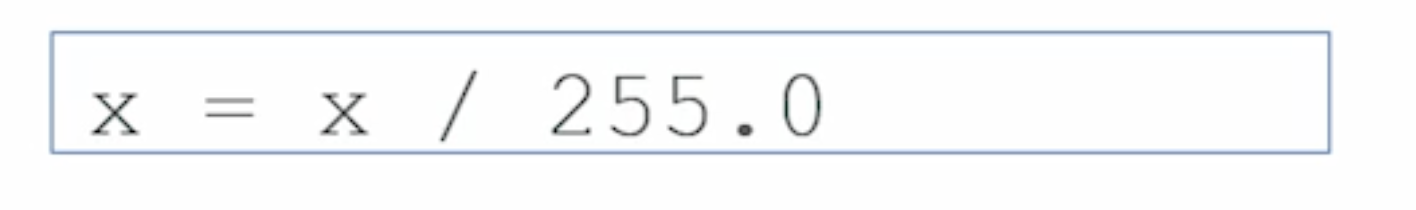

Another common technique is to adjust the inputs to a small value centered around zero. This is known as **standardization** in the statistics community.

We compute the** mean and the standard deviation** of the **inputs**. We then **subtract the mean and divide by the standard deviation**. When we subtract the mean, the value will be centered around zero. The standard deviation is a measure of the spread in the data. A large negative or large positive value will lead to greater standard deviation. If we then divide by the standard deviation, it means that all the values will get closer to zero. These are effective techniques to reduce the risk of neurons in the first layer being saturated.

The slide shows code in Python, how to do this using NumPy operations.

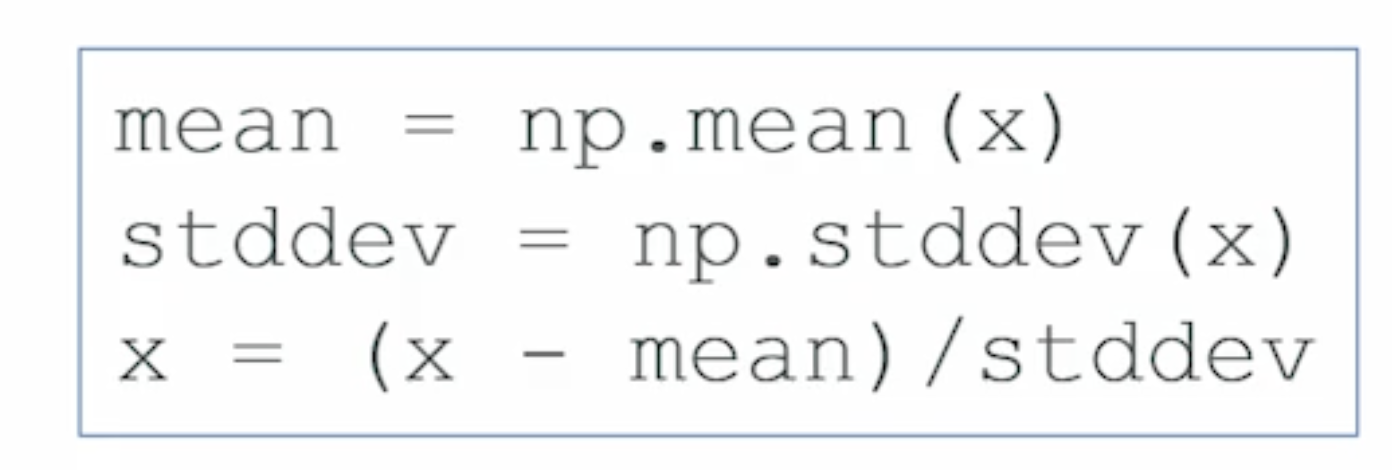

# 2. Batch Normalization

Even if we use normalized input data, we can still have problems with saturated neurons inside of the network in the hidden layers. This will much depend on the neuron types.
- If we have tanh neuron, the output range is between -1 and 1, which will reduce the risk of saturating neurons in the next layer.
However, there are also **neurons with unlimited output**. They run a greater risk of saturating the next layer. We can mitigate this using something known as **batch normalization**, which introduces normalization operations **between the layers**.

We will not get into the details of how to implement batch normalization. Instead, we will rely on the deep learning framework. The deep learning framework abstracts the batch normalization as a layer.

In this figure, we see batch normalization being applied between the weighted sum and the activation function.

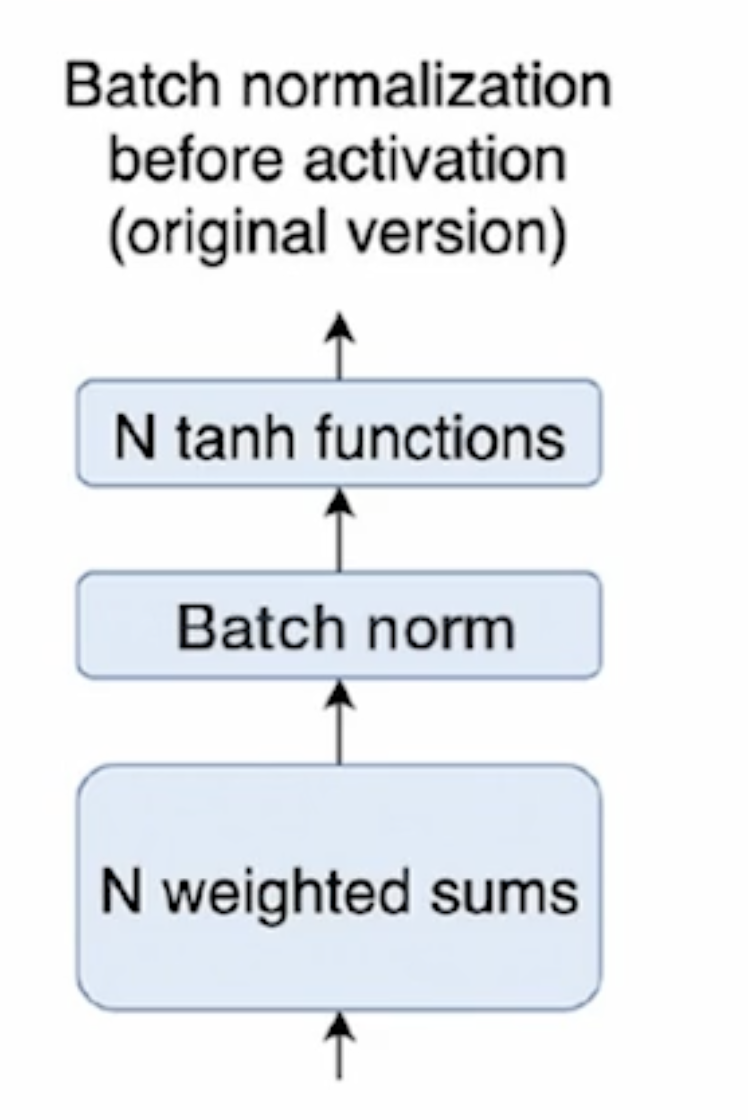

The code snippet on the slide shows how to implement this using TensorFlow.

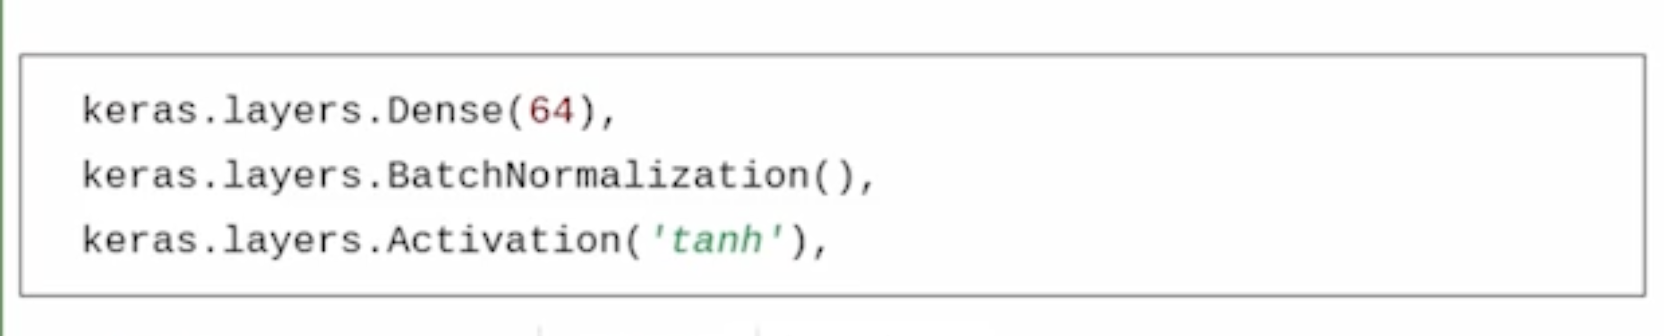

 In this figure, we see how it's instead applied after the activation function between this layer and the next layer.

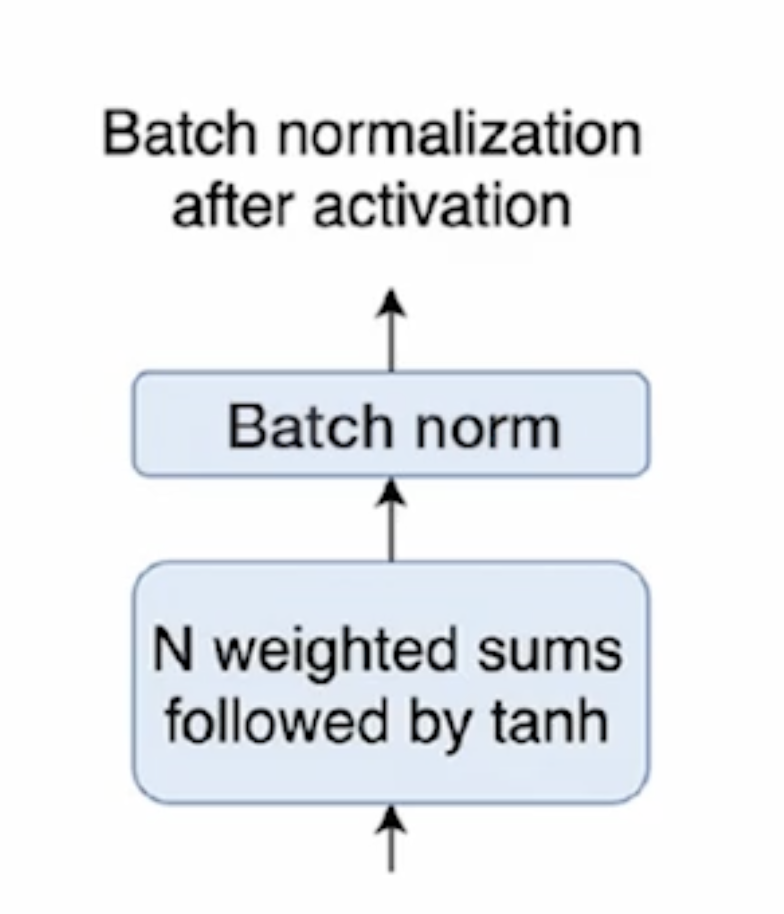

The code snippet on the slide shows how to implement this using TensorFlow.



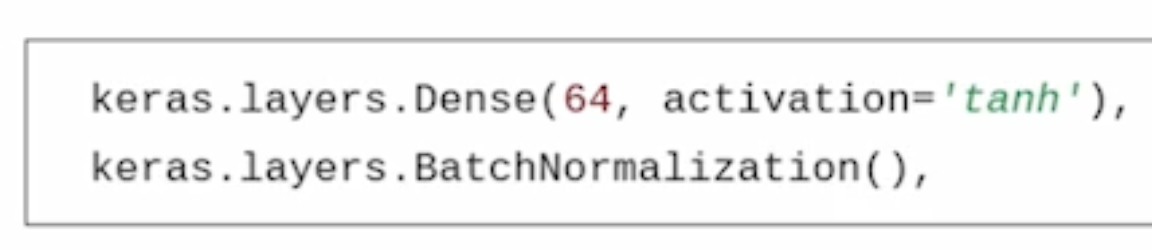



# 3. Weight Initialization

Not only the input values will impact the **weighted** sum. It will also depend on the initial weights for the network. **If the weights are closer to zero, the sum will be closer to zero, and that reduces the risk of saturating the neuron.** If we assume that the weights can be both positive and negative and we start with random weights, we would expect that the average sum is actually close to zero. However, the amount the average deviates from zero will depend on the number of input weights.
- Let's consider a neuron that only has two inputs and that these weights are initialized to values between negative one and one, and the inputs are also between negative one and one. The maximum sum would be two in this case. However, if we have a neuron with 10 inputs, the maximum value of the sum could be as much as 10. That is the more inputs to a neuron, the higher risk that the neuron will be saturated if we use a fixed range of weights.

We can use this observation to derive a formula for weight initialization. There are two common methods. One is **He initialization,** and the other is **Glorot initialization**. The Glorot initialization is recommended for tanh and sigmoid neurons. He initialization is recommended for something known as ReLU neurons that we will introduce soon.

This slide shows the formulas for Glorot and He initialization.

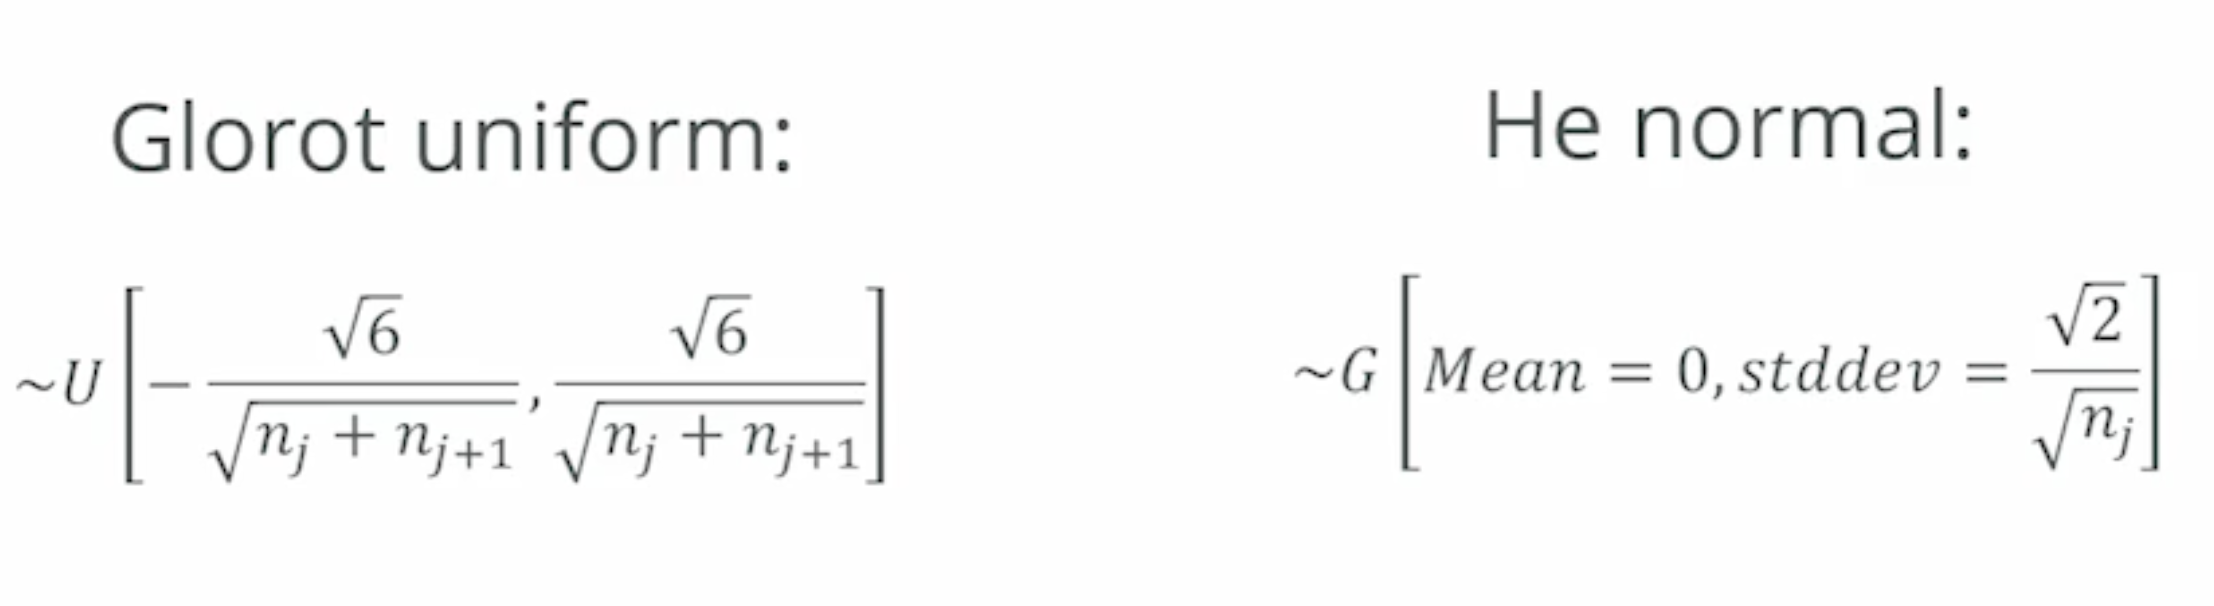

The **Glorot uniform initialization** is a uniform distribution between the min and max values shown on the slide. nj refers to the number of inputs to the current layer of neurons where nj+1 refers to the number of inputs in the next layer of neurons.

The **He normal distribution** is a Gaussian random distribution centered around zero with a standard deviation specified on the slide. He digitization considers only the inputs of the current layer.

The code snippet on the slide shows an example on how we can apply these initialization techniques using a DL framework. DL practitioners usually don't have to focus on the exact formulas, but can simply rely on the deep learning frameworks to implement these functions.


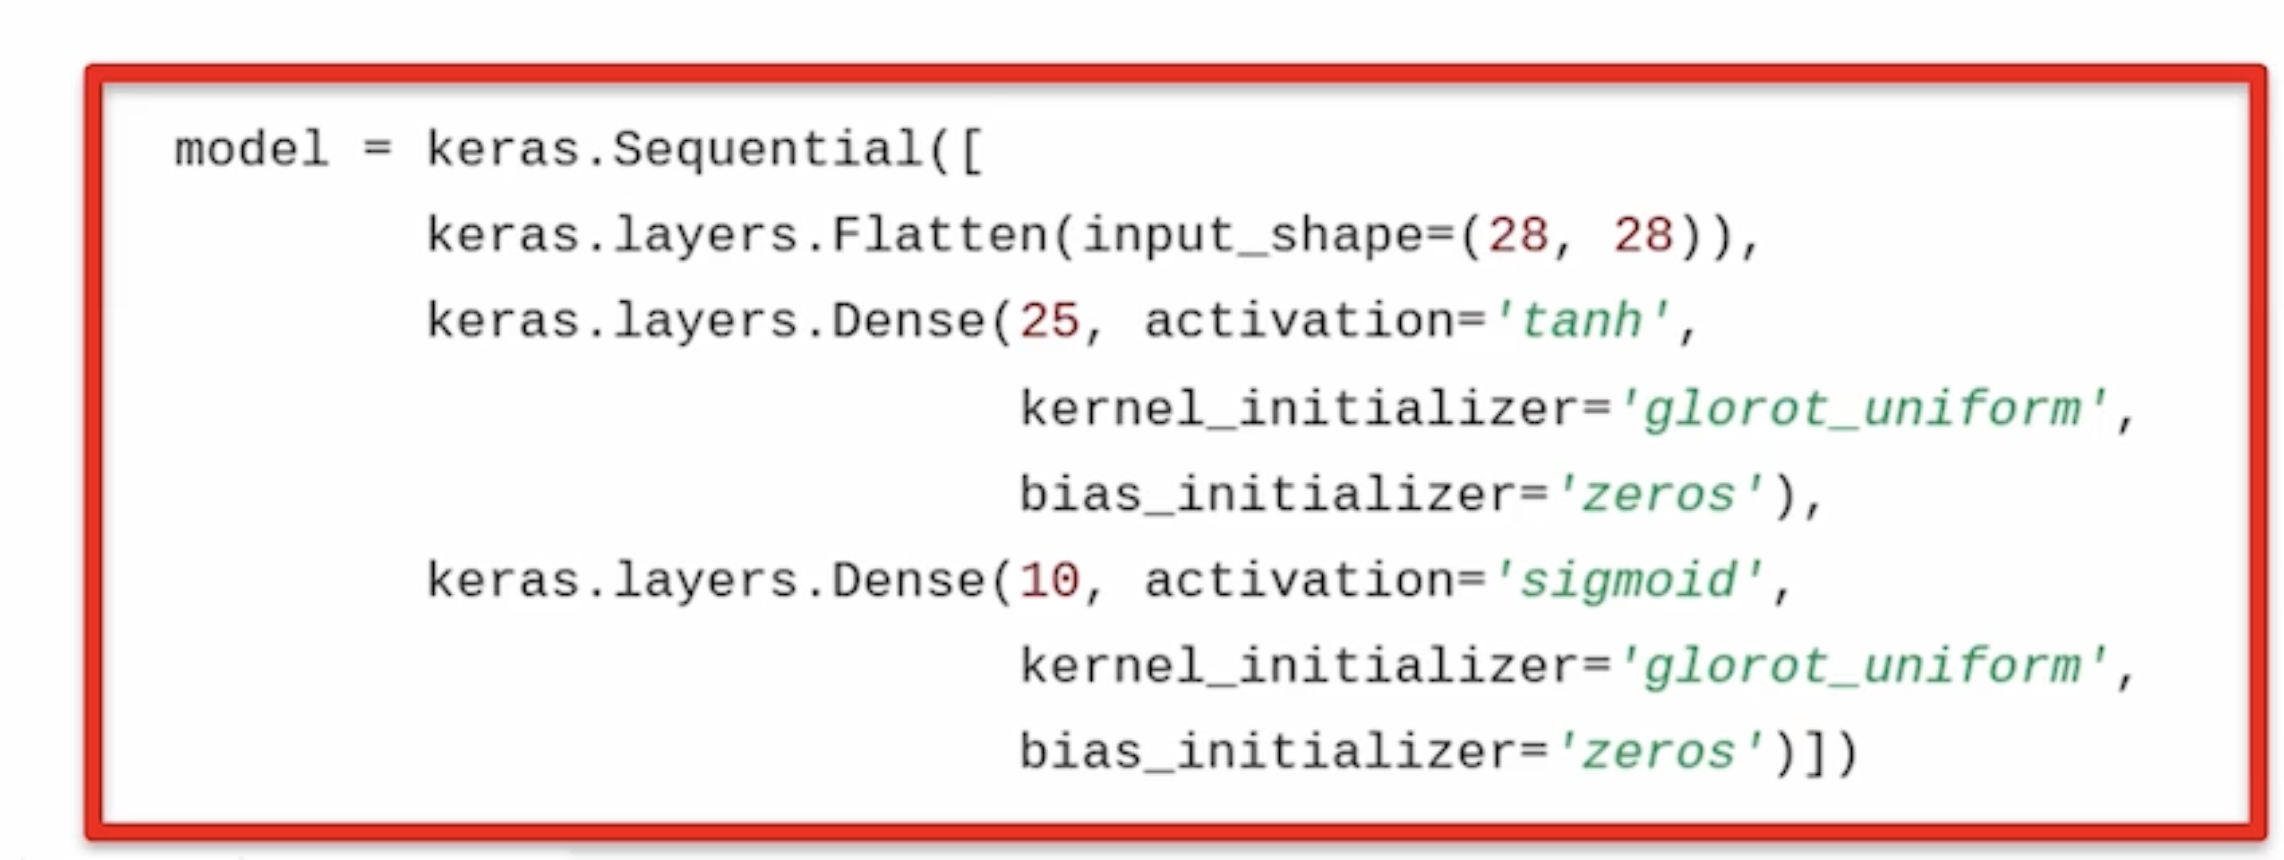




# Summary

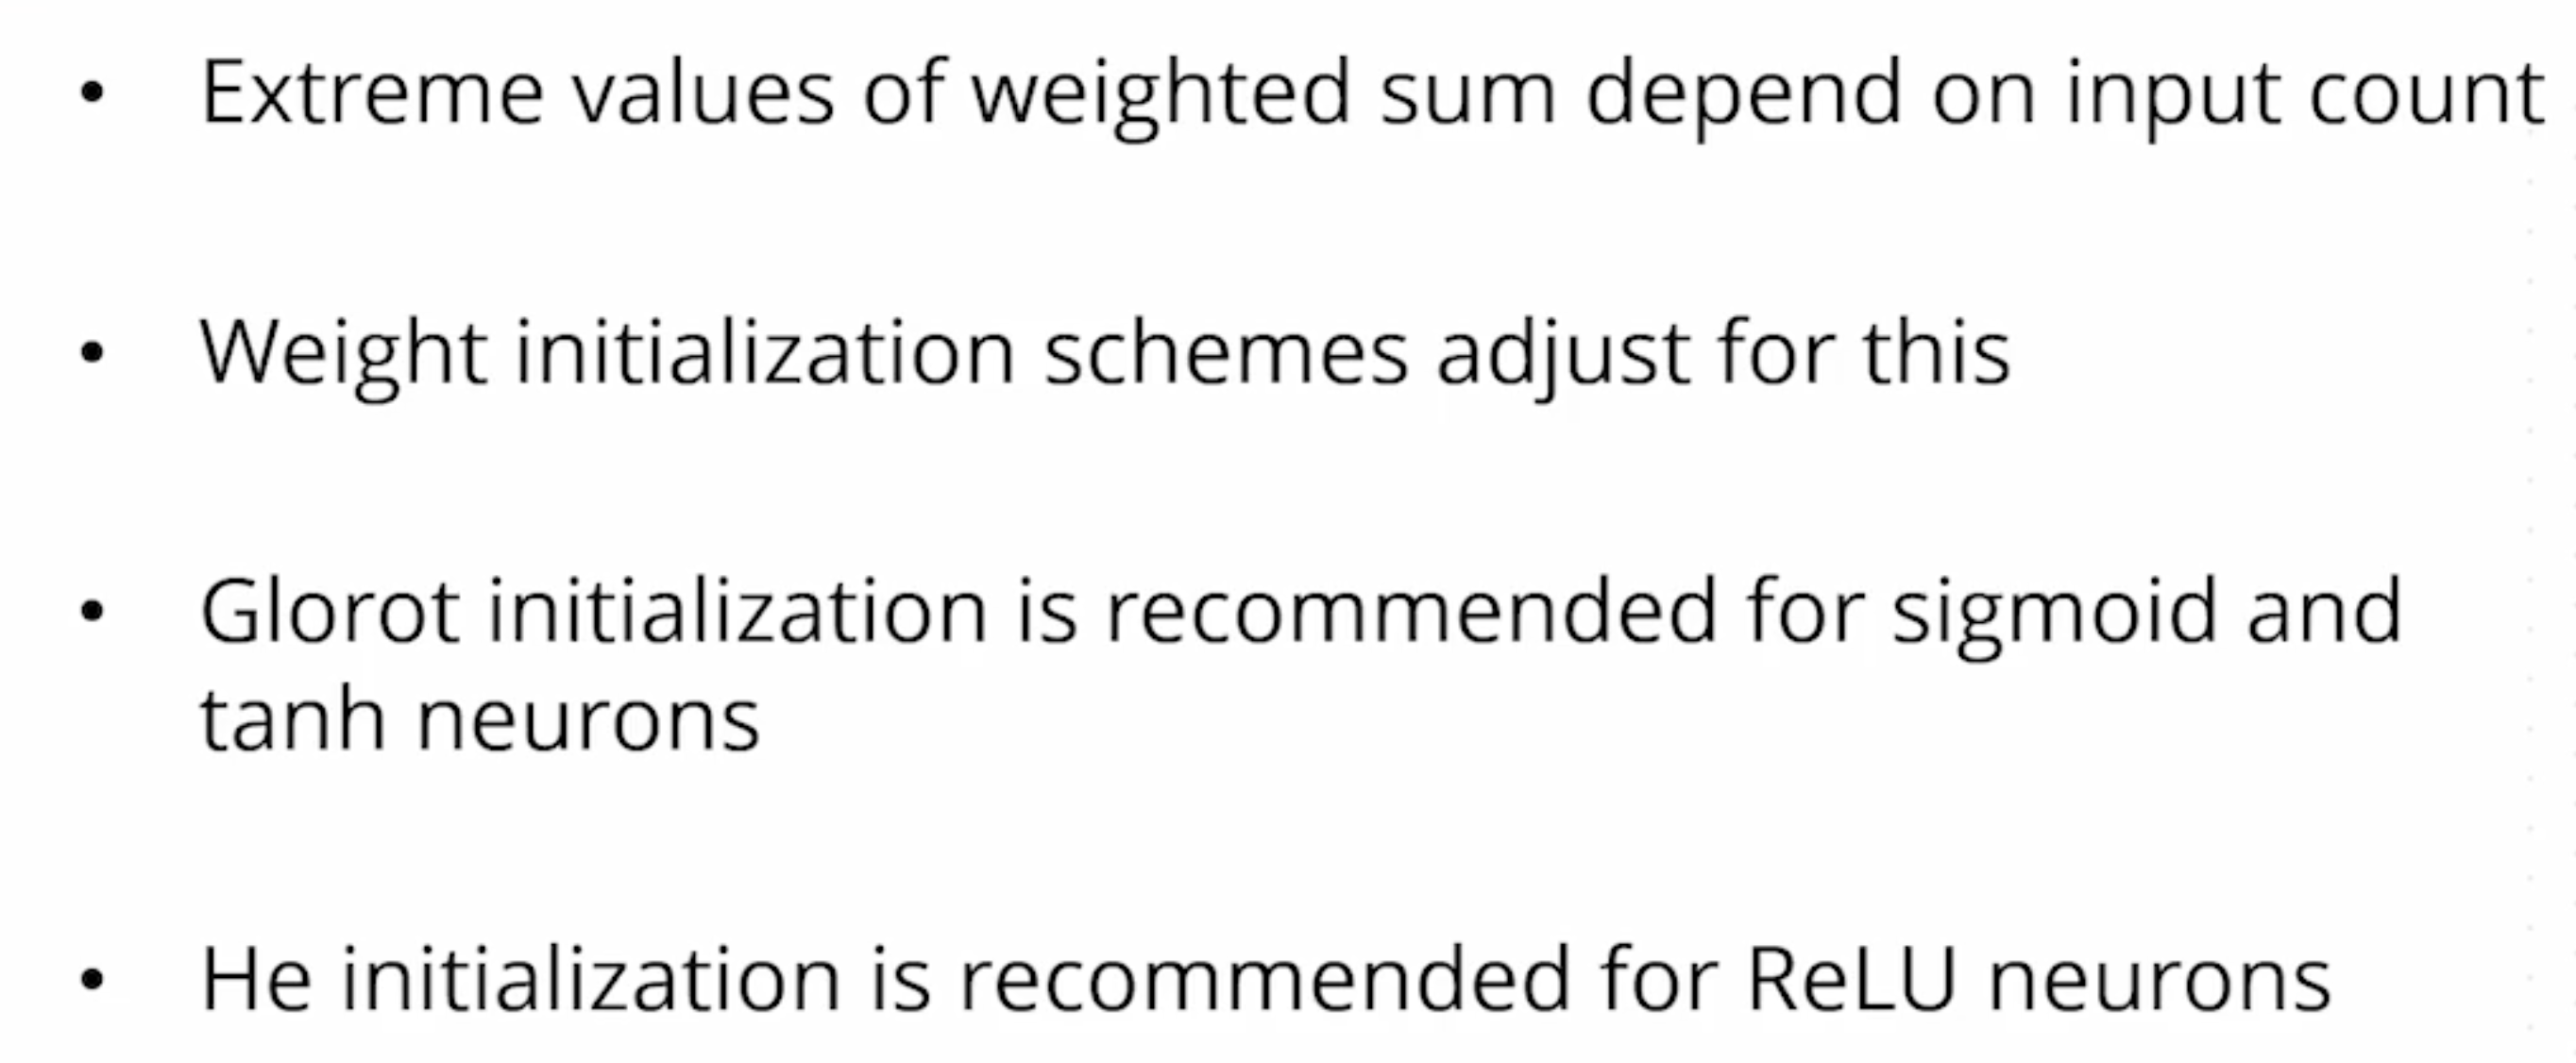